<a href="https://colab.research.google.com/github/anshuUnity/datascience-notebooks/blob/main/heart_attack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Author: Anshu Pal
Reference: [Scikit-learn](https://scikit-learn.org/stable/) documentation, [pandas](https://pandas.pydata.org/) documentation, [Seaborn](https://seaborn.pydata.org/) documentation and [Matplotlib](https://matplotlib.org/) documentation

And [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) discussion forum for the dataset

We wil begin by importing all the necessary libraries that are needed for the project, now google colab has already installed these libraries in their environment but if you are running locally then make sure to run `pip command`

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

`%matplotlib inline` makes sure that are graphs and charts are visible in the same notebook and not as a popup

Now we will start by loading data and getting the overview of the data

In [2]:
df = pd.read_csv("/content/heart.csv") #Change this path depending on the condition

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


`info()` method clearly tells us that there are 14 columns and there is no `nan` values in the dataset

Now let's have a look at first few rows of the dataset

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now let's use pandas `describe()` method to understand a data a bit

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Inference
We can already get lot of inference for the data, such as:


*   Maximum age is 77 and minimum age is 29

Data such as chol, trtbps is scattered a lot so we might need to scale these value later on


#Data Exploration
Now we'll explore this data through graphs and charts

Let's explore age distribution with heart attack to get better understanding of data

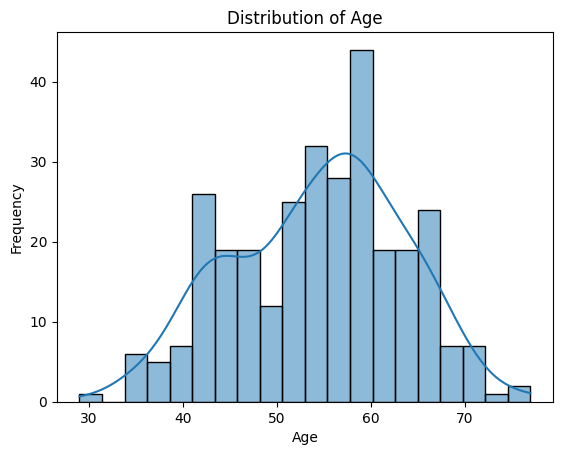

In [11]:
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Above graph clearly shows that maximum number of people belongs to 40-70 Age group

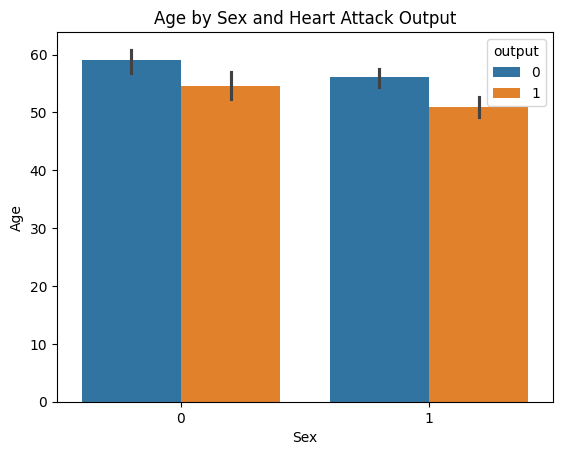

In [12]:
sns.barplot(x='sex', y='age', data=df, hue='output')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age by Sex and Heart Attack Output')
plt.show()

We can Females have slighlty lower risk of heart attack when compared to males

Now let's check distribution of cholestrol with heart attack chances

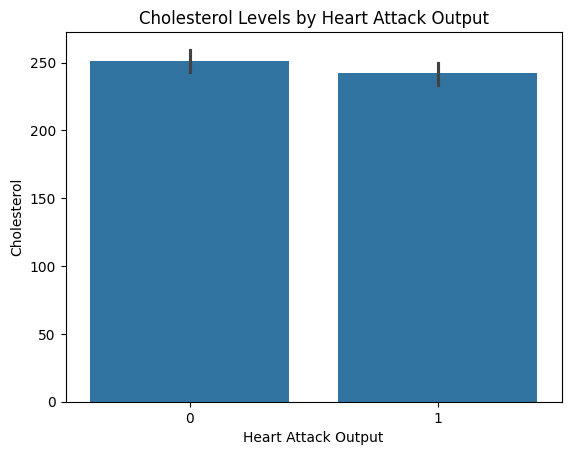

In [15]:
sns.barplot(x='output', y='chol', data=df)
plt.xlabel('Heart Attack Output')
plt.ylabel('Cholesterol')
plt.title('Cholesterol Levels by Heart Attack Output')
plt.show()

So this is obviously not giving much inference as you can see there are people with high cholestrol and never had a heart attack

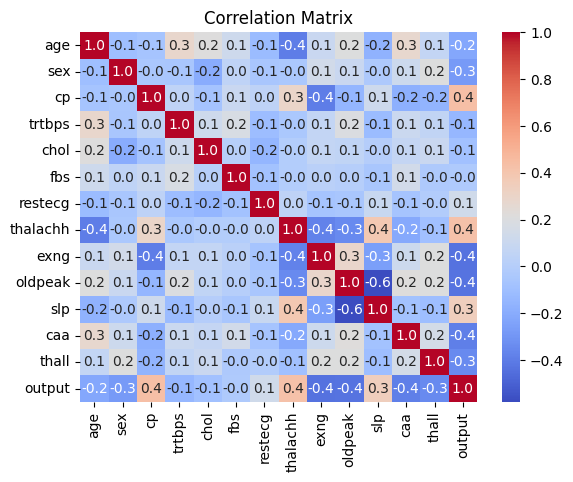

In [19]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

#Data Preprocessing

Now that we have good understanding of the data, let's begin by cleaning and scaling our data and then we'll process for model training

As our data have no `nan` values so we dont have to worry about it, therefore we'll proceed to scale our data and the split our data into train and test data

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

we will scale few columns to shrink their value between -1 to 1 using StandarScaler from sklearn

In [64]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [62]:
unscaled_data = df[['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'oldpeak', 'slp', 'caa', 'thall']]
unscaled_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trtbps    303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalachh  303 non-null    int64  
 7   oldpeak   303 non-null    float64
 8   slp       303 non-null    int64  
 9   caa       303 non-null    int64  
 10  thall     303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [66]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(unscaled_data)

In [68]:
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=unscaled_data.columns)
scaled_df

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
0,0.952197,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,2.036303,-0.649113,1.244593,1.123029
301,0.290464,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,0.138373,-0.649113,0.265082,1.123029


In [69]:
new_df = df.drop(columns=['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'oldpeak', 'slp', 'caa', 'thall'], axis=1)
new_df = pd.concat([new_df, scaled_df], axis=1)

In [70]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   exng      303 non-null    int64  
 2   output    303 non-null    int64  
 3   age       303 non-null    float64
 4   cp        303 non-null    float64
 5   trtbps    303 non-null    float64
 6   chol      303 non-null    float64
 7   fbs       303 non-null    float64
 8   restecg   303 non-null    float64
 9   thalachh  303 non-null    float64
 10  oldpeak   303 non-null    float64
 11  slp       303 non-null    float64
 12  caa       303 non-null    float64
 13  thall     303 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 33.3 KB


In [78]:
X = new_df.drop(columns=['output'], axis=1)
y = new_df[['output']]

Convert value to numpy array before train test split

In [79]:
X = X.values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Above code will split data into training and testing set where 20% of data will be used for testing and remaning 80% for training, we have also set random_state so that we can generate same split each time

Now we can start model training, very first model train is logistics regression, we'll try bunch of other algorithm as well and compare all of theirs performance and accuracy

#Logistics Regression Model Training

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logic_model = LogisticRegression(penalty="l2")

In [83]:
logic_model = logic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Logistics Regression Model Testing
And also calculating accuracy and confusion matrix

In [88]:
y_pred = logic_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Above are the prediction made by our logistics regression model, now we'll check the accuracy of our model by comparing each predicted value against true value

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


Accuracy score for model is already 86% which is really great, this means that 86% of the time our model has predicted correct value

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[25  4]
 [ 4 28]]


Our model has done fantastic job of predicting true prositive and true negatives

In [99]:
def generate_matrix_graph(conf_matrix):

  labels = ["True Negative", "False Positive", "False Negative", "True Positive"]

  # Convert the confusion matrix to a DataFrame for easier plotting
  df_cm = pd.DataFrame(conf_matrix, index=labels[:2], columns=labels[2:])

  # Plot heatmap
  plt.figure(figsize=(6, 4))
  sns.heatmap(df_cm, annot=True, fmt='d', cmap='rocket', cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

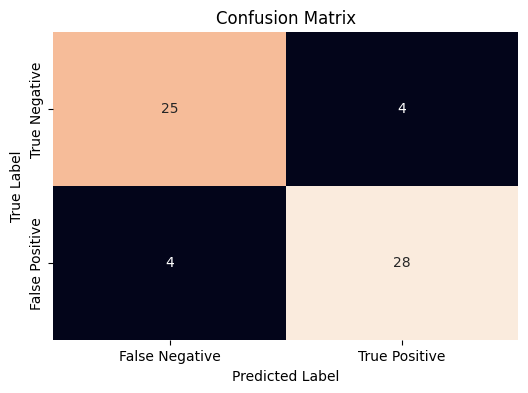

In [100]:
generate_matrix_graph(conf_matrix)

#KNN Algorithm
Now let's use KNN algorithm and let's see whether our model get better

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
def knn_classifier(n_neighbour):
  knn = KNeighborsClassifier(n_neighbors=n_neighbour)
  knn = knn.fit(X_train, y_train)
  return knn

Let's try experimenting with neighbour value, we'll start by 5

In [103]:
knn = knn_classifier(5)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [105]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Now let's again check the accuracy of our model

In [106]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8524590163934426


So our KNN model with value 5 has achieved accuracy of 85%

Let's check confusion matrix

In [107]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[26  3]
 [ 6 26]]


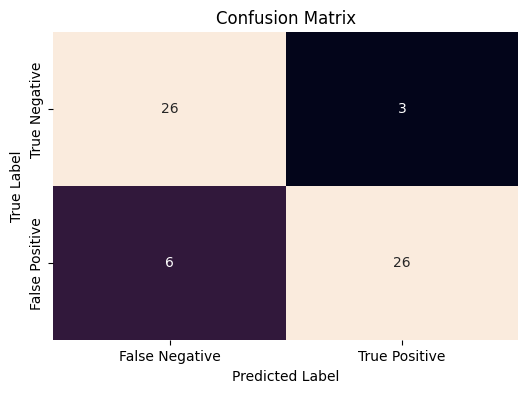

In [108]:
generate_matrix_graph(conf_matrix)

Now let's try different value of of n_neighbour

In [109]:
def knn_classifier_experiment(n_neighbour):
  knn = KNeighborsClassifier(n_neighbors=n_neighbour)
  knn = knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

In [123]:
knn_classifier_experiment(6)

Accuracy: 0.8524590163934426


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [124]:
knn_classifier_experiment(7)

Accuracy: 0.8852459016393442


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N-neighbour with value 7 is giving almost 89% acuracy which is a huge improvement

#Decision Tree

Now we'll use  decision tree algorithm to make tree based learning

In [125]:
from sklearn import tree

In [126]:
dst = tree.DecisionTreeClassifier()

In [128]:
dst = dst.fit(X_train, y_train)

In [135]:
y_pred = dst.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8360655737704918


accuracy achieved is 83%

In [133]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[26  3]
 [ 7 25]]


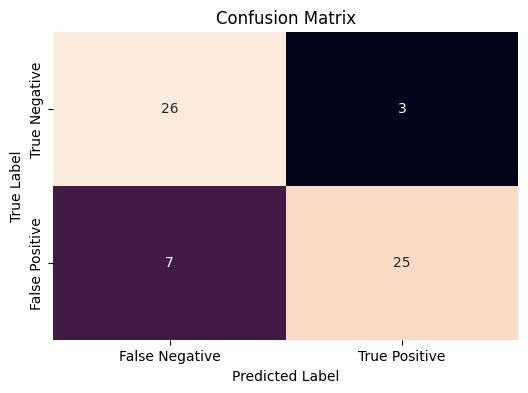

In [134]:
generate_matrix_graph(conf_matrix)

#Conclusion

**Conclusion:**

In this analysis, we implemented the various algorithm to predict whether person will have heart attack based on historical health data. The accuracy of our model was **88%** which is most of all algorithm we have tested.

**Findings:**

- The KNN algorithm showed promising results in predicting whether person will have heart attack based on historical weather data.
- Our model achieved an accuracy of **88%** on the testing set, indicating that it can make reasonably accurate predictions.
- Further evaluation and fine-tuning of hyperparameters such as nearest neighbour value could potentially improve the model's performance.

**Challenges Faced:**

- One challenge was scaling data in the historical heart attack dataset. We addressed this by scaling and transforming records.
- Another challenge was selecting the appropriate number of neighbors (K) for the KNN algorithm. We experimented with different values of K to find the optimal balance between bias and variance.

**Potential Improvements:**

- Feature engineering: We could explore creating new features from existing ones or incorporating additional relevant data, such as genetics data, or person smoke or not, have children or not.
- Model selection: Apart from KNN,Logistics regression or Decision Tree we could try other machine learning algorithms such as random forests, or neural networks to compare their performance.
- Hyperparameter tuning: Conducting a more exhaustive search for optimal hyperparameters could potentially improve the model's accuracy further.
- Ensemble methods: We could explore ensemble methods like bagging or boosting to combine multiple models for better predictive performance.